In [15]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
# import os

In [16]:
# output_dir = '../results/plots/distributions'
# os.makedirs(output_dir, exist_ok=True)

COLUMN_NAMES = [
    'label', 'lepton_pt', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
    'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b_tag',
    'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b_tag',
    'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b_tag',
    'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b_tag',
    'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
]


df = pd.read_csv('../data/raw/HIGGS.csv', header=None, names=COLUMN_NAMES, nrows=500000)

df.head()

,label,lepton_pt,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b_tag,...,jet_4_eta,jet_4_phi,jet_4_b_tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [17]:
df_signal = df[df['label'] == 1.0]
df_background = df[df['label'] == 0.0]

print(len(df_signal))
print(len(df_background))

264703
235297


In [21]:
low_level_features = ['lepton_pt', 'missing_energy_magnitude', 'jet_1_pt', 'jet_2_pt', 'jet_3_pt', 'jet_4_pt']
high_level_features = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features_to_plot = low_level_features + high_level_features

xlabel_dict = {
    'm_jj': r'$m_{jj}$ (GeV)',
    'm_jjj': r'$m_{jjj}$ (GeV)',
    'm_lv': r'$m_{l\nu}$ (GeV)',
    'm_jlv': r'$m_{jl\nu}$ (GeV)',
    'm_bb': r'$m_{bb}$ (GeV)',
    'm_wbb': r'$m_{Wbb}$ (GeV)',
    'm_wwbb': r'$m_{WWbb}$ (GeV)',
    'lepton_pt': r'Lepton $p_T$ (GeV)',
    'missing_energy_magnitude': r'Missing Transverse Energy (GeV)',
    'jet_1_pt': r'Jet 1 $p_T$ (GeV)',
    'jet_2_pt': r'Jet 2 $p_T$ (GeV)',
    'jet_3_pt': r'Jet 3 $p_T$ (GeV)',
    'jet_4_pt': r'Jet 4 $p_T$ (GeV)'
}

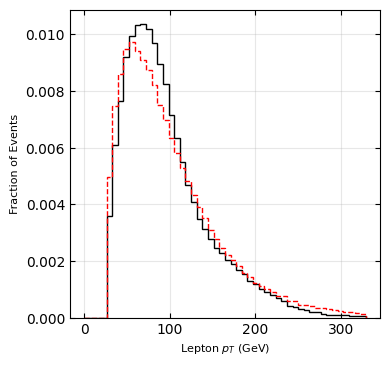

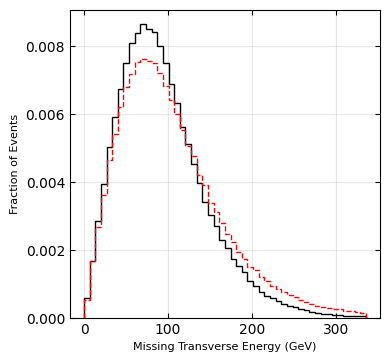

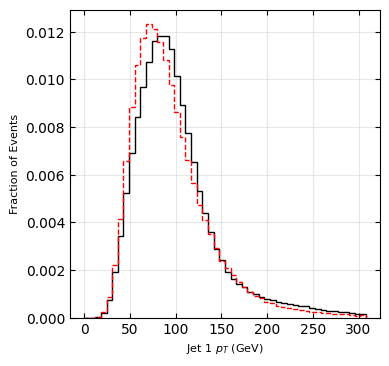

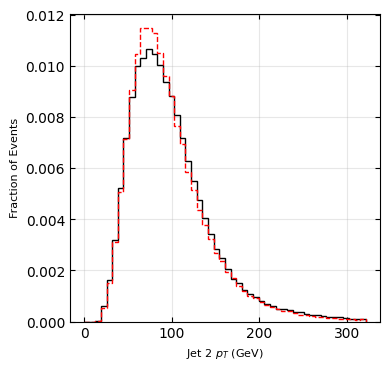

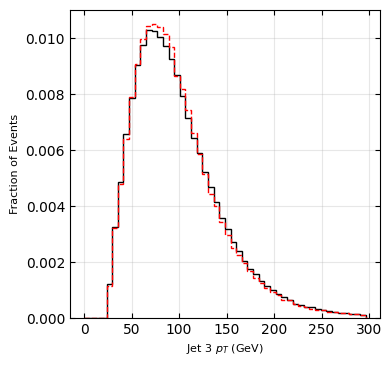

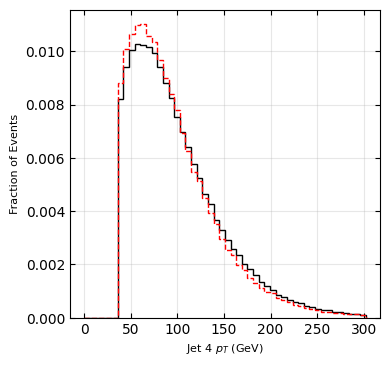

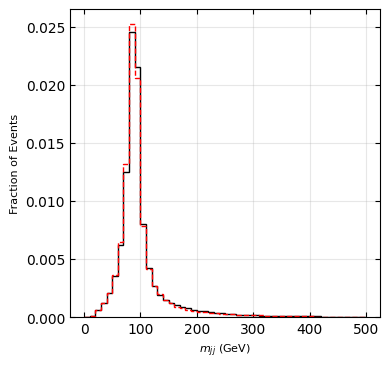

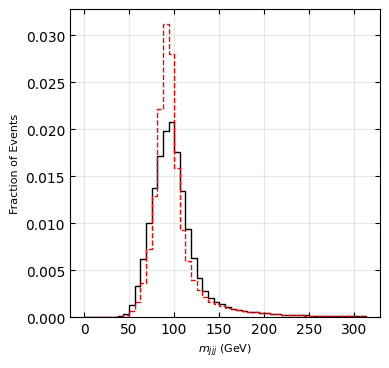

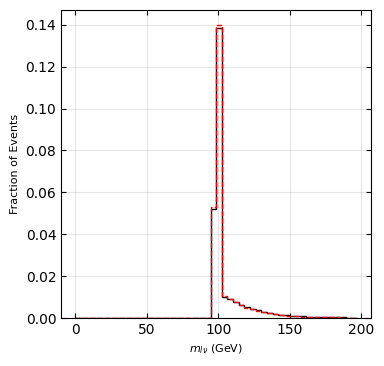

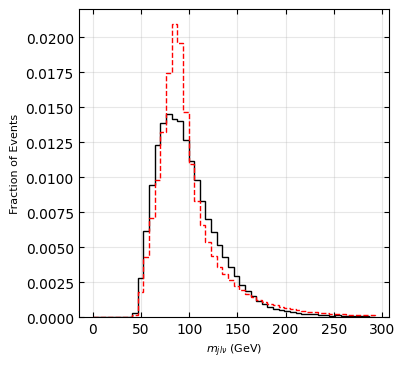

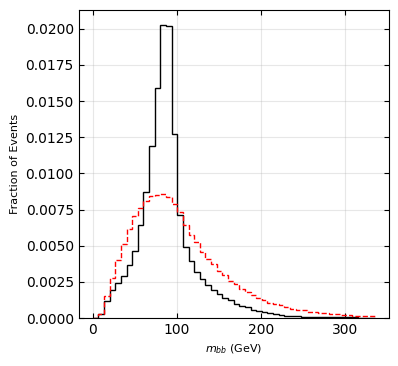

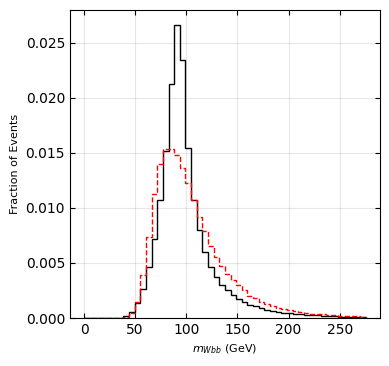

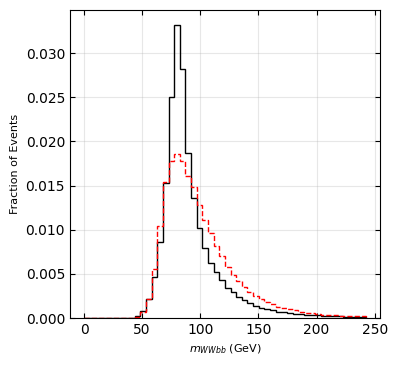

In [20]:
scale_factor = 100

for feature in features_to_plot:
    plt.figure(figsize=(4, 4)) 

    combined_data = pd.concat([df_signal[feature], df_background[feature]]) * scale_factor
    data_max = np.percentile(combined_data, 99.5)
    plot_range = (0, data_max)

    plt.hist(
        df_signal[feature] * scale_factor,
        bins = 50,
        density = True,
        histtype = 'step',
        range = plot_range,
        label = "signal",
        color = "black",
        linestyle = "solid"
    )

    plt.hist(
        df_background[feature] * scale_factor,
        bins = 50,
        density = True,
        histtype = 'step',
        range = plot_range,
        label = "background",
        color = 'red',
        linestyle = 'dashed'
    )

    plt.tick_params(top=True, right=True, direction='in', which='both')

    label_x = xlabel_dict.get(feature, f'{feature} (GeV)')
    plt.xlabel(label_x, fontsize=8)
    plt.ylabel('Fraction of Events', fontsize=8)
    plt.grid(alpha=0.3)
            
    plt.show()
    plt.close()